# BaseLine Model

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 80
# from sklearn.calibration import calibration_curve, CalibrationDisplay
import warnings
warnings.filterwarnings('ignore')
import pickle
import os 
from joblib import dump, load

In [7]:
from ift6758.data.data_Acquisition import dataDownload

In [8]:
from ift6758.data.tidy_data import tidyData

In [9]:
from ift6758.data.Feature_Engineering1 import combineAllFeatures, goalRatioPerDistance, goalRatioPerAngle

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```



# Get training and testing data**

In [17]:
# define the seasons we are intressted in : 
years = (2015,2016, 2017,2018,2019)

Dowload the data :

In [18]:
for i in years : 
    dataDownload(i)

file already exsiste
file already exsiste
file already exsiste
file already exsiste
file already exsiste


Tidy the data :

In [19]:
for i in years : 
    tidyData(i)

file already exsiste
file already exsiste
file already exsiste
file already exsiste
file already exsiste


Separate the training and tes set :

In [3]:
fina_test_set = pd.read_csv('./2019finalDataset.csv')

In [4]:
df_2015_2016 = pd.read_csv('./2015finalDataset.csv')
df_2016_2017 = pd.read_csv('./2016finalDataset.csv')
df_2017_2018 = pd.read_csv('./2017finalDataset.csv')
df_2018_2019 = pd.read_csv('./2018finalDataset.csv')

In [5]:
training_df =  pd.concat([df_2015_2016, df_2016_2017,df_2017_2018,df_2018_2019])

Create new columns :

In [10]:
train_set = combineAllFeatures(training_df)
train_set

,gameID,eventType,period,periodTime,periodType,teamOfShooter,homeOrAway,xCoord,yCoord,shooter,...,emptyNet,strength,season,rinkSide,Is_goal,empty_Net,Y_net,X_net,Distance_from_net,Angle_from_net
0,2015020001,Shot,1,00:51,REGULAR,Toronto Maple Leafs,home,-55.0,6.0,Brad Boyes,...,NaN,NaN,2015,right,0,0,0,-89,34.525353,10.007980
1,2015020001,Shot,1,01:05,REGULAR,Toronto Maple Leafs,home,-79.0,0.0,Nazem Kadri,...,NaN,NaN,2015,right,0,0,0,-89,10.000000,0.000000
2,2015020001,Shot,1,01:06,REGULAR,Toronto Maple Leafs,home,-75.0,-1.0,Nazem Kadri,...,NaN,NaN,2015,right,0,0,0,-89,14.035669,4.085617
3,2015020001,Shot,1,01:53,REGULAR,Toronto Maple Leafs,home,-55.0,-36.0,Daniel Winnik,...,NaN,NaN,2015,right,0,0,0,-89,49.517674,46.636577
4,2015020001,Shot,1,02:37,REGULAR,Toronto Maple Leafs,home,-61.0,-1.0,Joffrey Lupul,...,NaN,NaN,2015,right,0,0,0,-89,28.017851,2.045408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85397,2018030417,Goal,3,15:22,REGULAR,St. Louis Blues,away,-77.0,7.0,Zach Sanford,...,False,Even,2018,right,1,0,0,-89,13.892444,30.256437
85398,2018030417,Shot,3,15:51,REGULAR,St. Louis Blues,away,-69.0,7.0,Alexander Steen,...,NaN,NaN,2018,right,0,0,0,-89,21.189620,19.290046
85399,2018030417,Shot,3,15:55,REGULAR,St. Louis Blues,away,-65.0,-4.0,Ryan O'Reilly,...,NaN,NaN,2018,right,0,0,0,-89,24.331050,9.462322
85400,2018030417,Shot,3,16:50,REGULAR,Boston Bruins,home,42.0,3.0,Marcus Johansson,...,NaN,NaN,2018,left,0,0,0,89,47.095647,3.652223


In [142]:
df1=pd.DataFrame(train_set[["Distance_from_net","Is_goal"]])
df=df1.dropna()
print(df)
#     train_set.drop(a)
distance_input=df["Distance_from_net"]
isGoal_output=df["Is_goal"]
X_train, X_test, y_train, y_test = train_test_split(distance_input, isGoal_output, test_size=0.3, random_state=42)
X_train= np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
lg=LogisticRegression()
print(X_train)
lg.fit(X_train,y_train)
prediction=lg.predict(X_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f = f1_score(y_test, prediction)
dump(lg, './models/baseline_distance_logistic_reg.joblib')
print(lg.predict_proba(X_test))
lg.score(X_test, y_test)
print("The classification report is as follows:\n", classification_report(y_test,prediction))


       Distance_from_net  Is_goal
0              34.525353        0
1              10.000000        0
2              14.035669        0
3              49.517674        0
4              28.017851        0
...                  ...      ...
85397          13.892444        1
85398          21.189620        0
85399          24.331050        0
85400          47.095647        0
85401          51.000000        1

[331209 rows x 2 columns]
[[32.14031736]
 [11.18033989]
 [14.86606875]
 ...
 [76.1642961 ]
 [48.75448697]
 [43.28972164]]
[[0.90993371 0.09006629]
 [0.93821023 0.06178977]
 [0.8528458  0.1471542 ]
 ...
 [0.8600959  0.1399041 ]
 [0.94473017 0.05526983]
 [0.85998264 0.14001736]]
The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     89959
           1       0.00      0.00      0.00      9404

    accuracy                           0.91     99363
   macro avg       0.45      0.50      0.48     99363

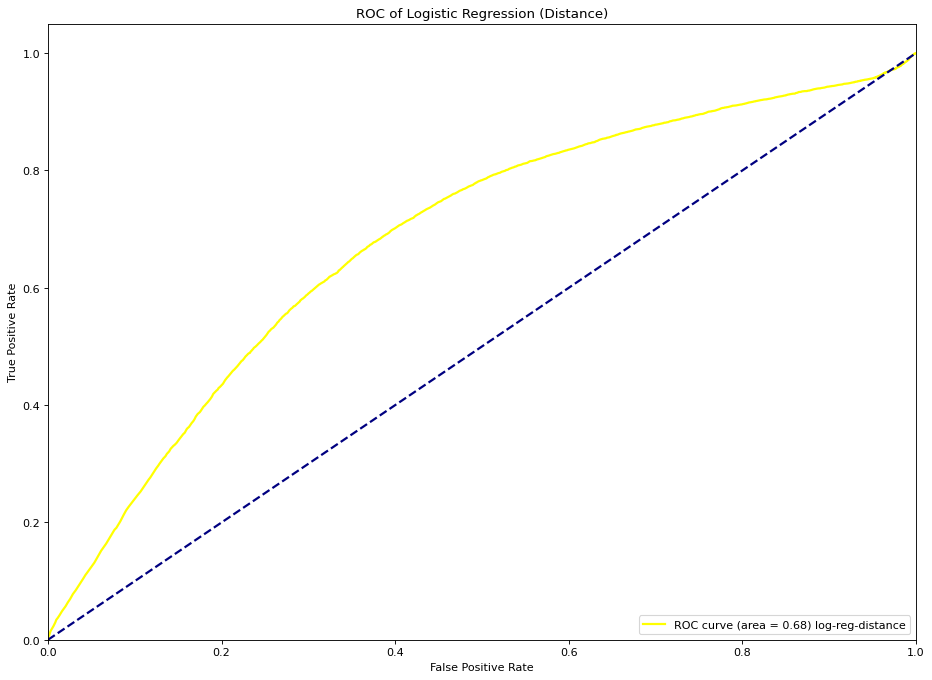

In [135]:
from sklearn.metrics import roc_curve, auc

y_score = lg.predict_proba(X_test)[:,1]
a, b, _ = roc_curve(y_test, y_score)
roc_auc_d = auc(a, b)
plt.figure()
plt.plot(
    a,
    b,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance" % roc_auc_d,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Distance)")
plt.legend(loc="lower right")

plt.savefig('./figures/q31_logR_ROC_distance.png.png')
plt.show()

A histogram of shot counts (goals and no-goals separated), binned by distance

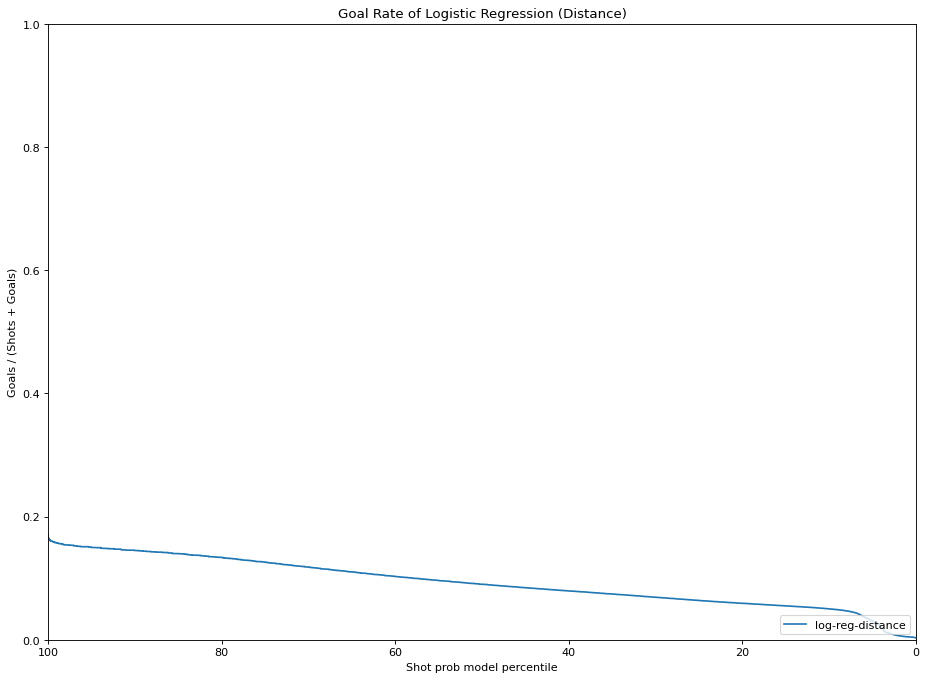

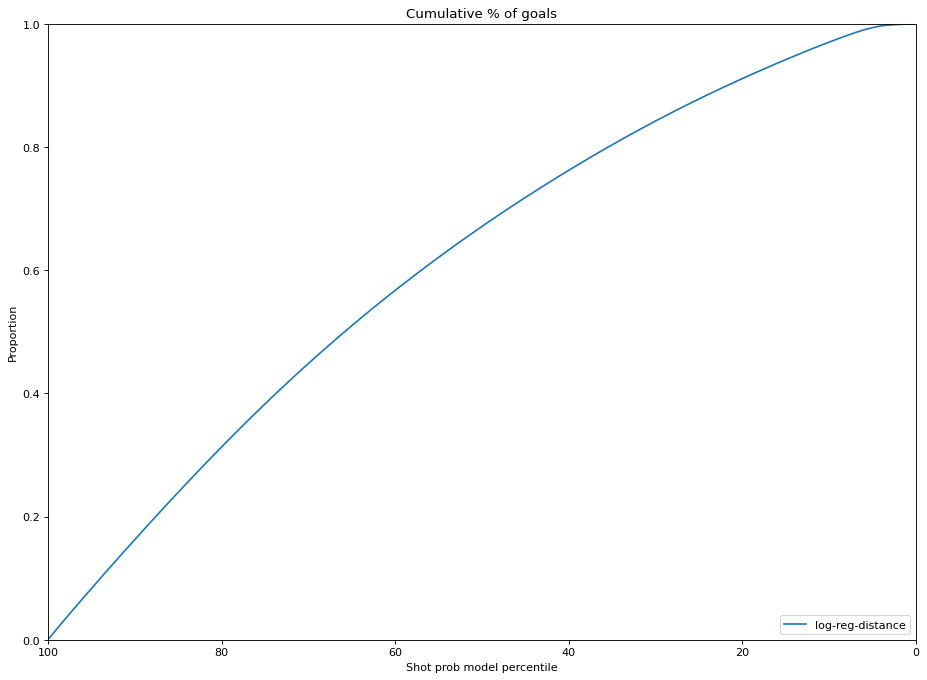

In [139]:
#model percentile
iu = lg.predict_proba(X_test)[:,1]
n = len(iu)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

iu_y = iu[::-1]
iu_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum = np.cumsum(iu_y)


plt.figure()
plt.plot(
    x_axis,
    iu_y,
    label = 'log-reg-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Distance)")
plt.legend(loc="lower right")
plt.savefig('./figures/q31_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    iu_y_sum/sum(iu_y),
    label = 'log-reg-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('./figures/q31_logR_CP.png')
plt.show()

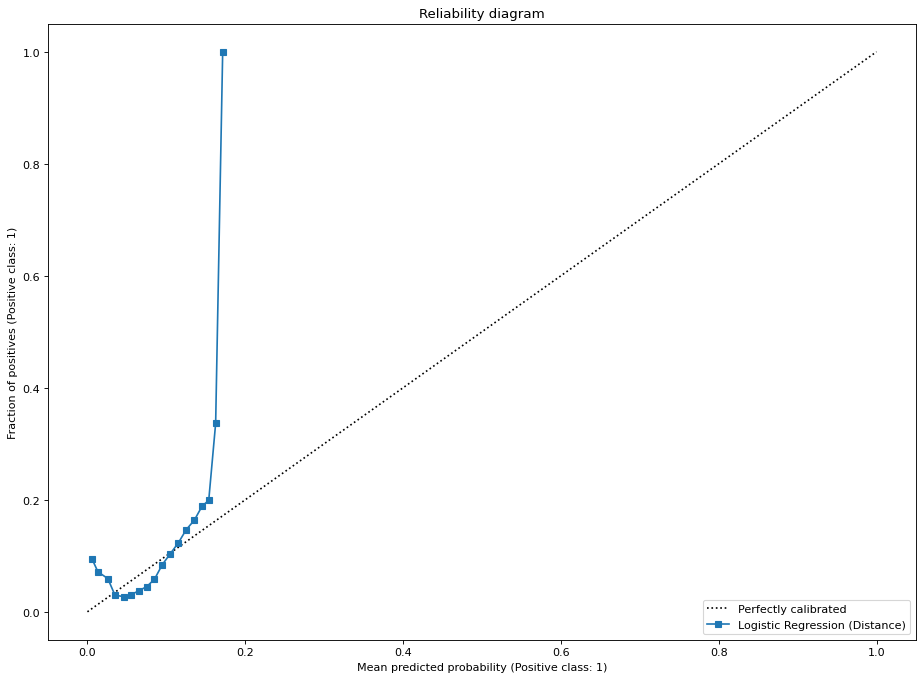

In [140]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(lg, X_test, y_test, name='Logistic Regression (Distance)', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('./figures/31_logR_RD_Distance.png')
plt.show()

In [141]:
#Logistic Regresion For angles

In [13]:
df1=pd.DataFrame(train_set[["Angle_from_net","Is_goal"]])
df=df1.dropna()
print(df)
#     train_set.drop(a)
distance_input=df["Angle_from_net"]
isGoal_output=df["Is_goal"]
X_train, X_test, y_train, y_test = train_test_split(distance_input, isGoal_output, test_size=0.3, random_state=42)
X_train= np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
lg_2=LogisticRegression()
print(X_train)
lg_2.fit(X_train,y_train)
prediction=lg_2.predict(X_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f = f1_score(y_test, prediction)
dump(lg_2, './models/baseline_angle_logistic_reg.joblib')
print(lg_2.predict_proba(X_test))
lg_2.score(X_test, y_test)
print("The classification report:\n", classification_report(y_test,prediction))



       Angle_from_net  Is_goal
0           10.007980        0
1            0.000000        0
2            4.085617        0
3           46.636577        0
4            2.045408        0
...               ...      ...
85397       30.256437        1
85398       19.290046        0
85399        9.462322        0
85400        3.652223        0
85401       28.072487        1

[331209 rows x 2 columns]
[[ 5.35582504]
 [10.30484647]
 [70.34617594]
 ...
 [ 3.76403486]
 [25.51387043]
 [ 6.63251462]]
[[0.87584021 0.12415979]
 [0.87722112 0.12277888]
 [0.93247198 0.06752802]
 ...
 [0.91951723 0.08048277]
 [0.89826758 0.10173242]
 [0.87584021 0.12415979]]
The classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     89959
           1       0.00      0.00      0.00      9404

    accuracy                           0.91     99363
   macro avg       0.45      0.50      0.48     99363
weighted avg       0.82      0.91      0.86     9

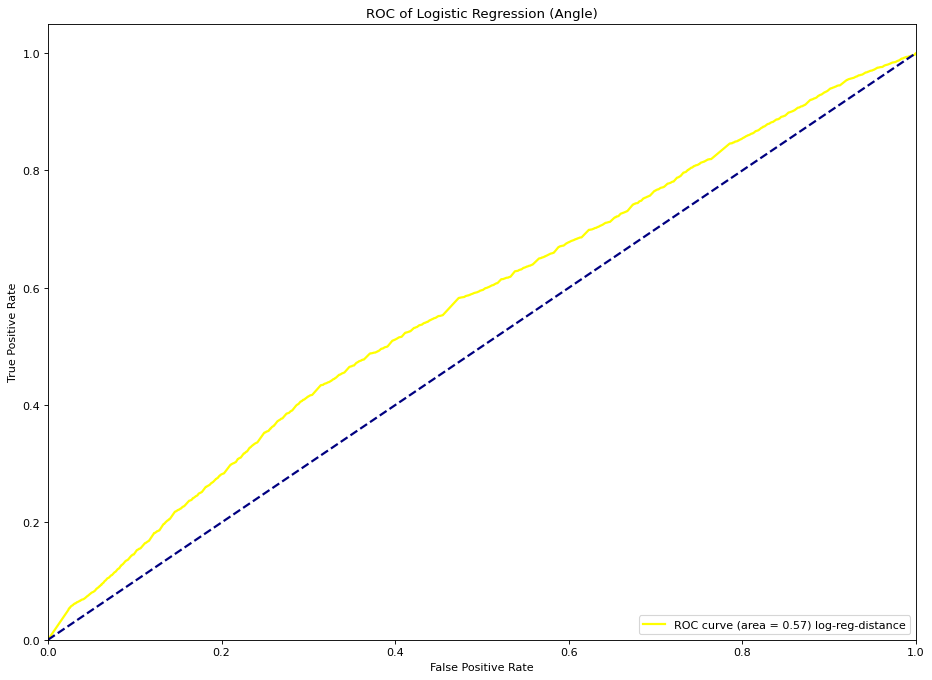

In [14]:
from sklearn.metrics import roc_curve, auc

y_score = lg_2.predict_proba(X_test)[:,1]
a, b, _ = roc_curve(y_test, y_score)
roc_auc_d = auc(a, b)
plt.figure()
plt.plot(
    a,
    b,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance" % roc_auc_d,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Angle)")
plt.legend(loc="lower right")

plt.savefig('./figures/q31_logR_ROC_angle.png.png')
plt.show()

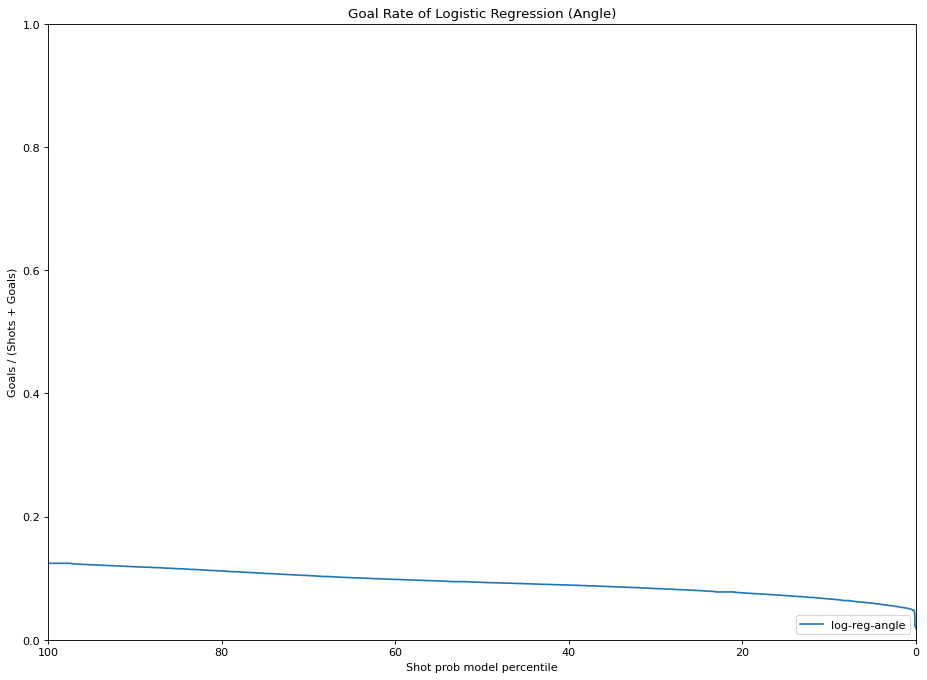

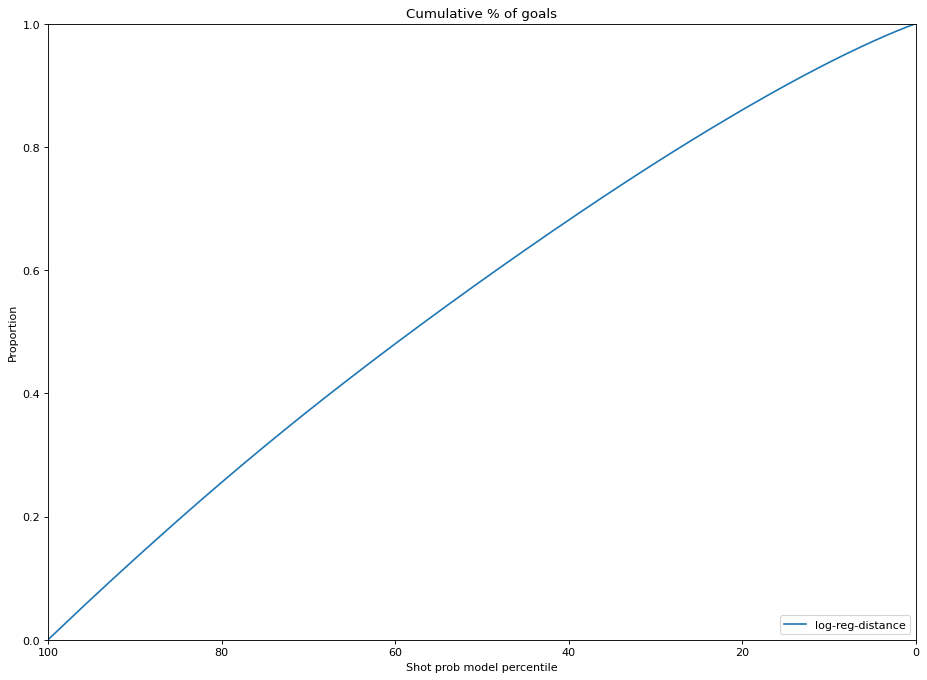

In [15]:
#model percentile
iu = lg_2.predict_proba(X_test)[:,1]
n = len(iu)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

iu_y = iu[::-1]
iu_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum = np.cumsum(iu_y)


plt.figure()
plt.plot(
    x_axis,
    iu_y,
    label = 'log-reg-angle'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Angle)")
plt.legend(loc="lower right")
plt.savefig('./figures/q31_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    iu_y_sum/sum(iu_y),
    label = 'log-reg-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('./figures/q31_logR_CP_angle.png')
plt.show()

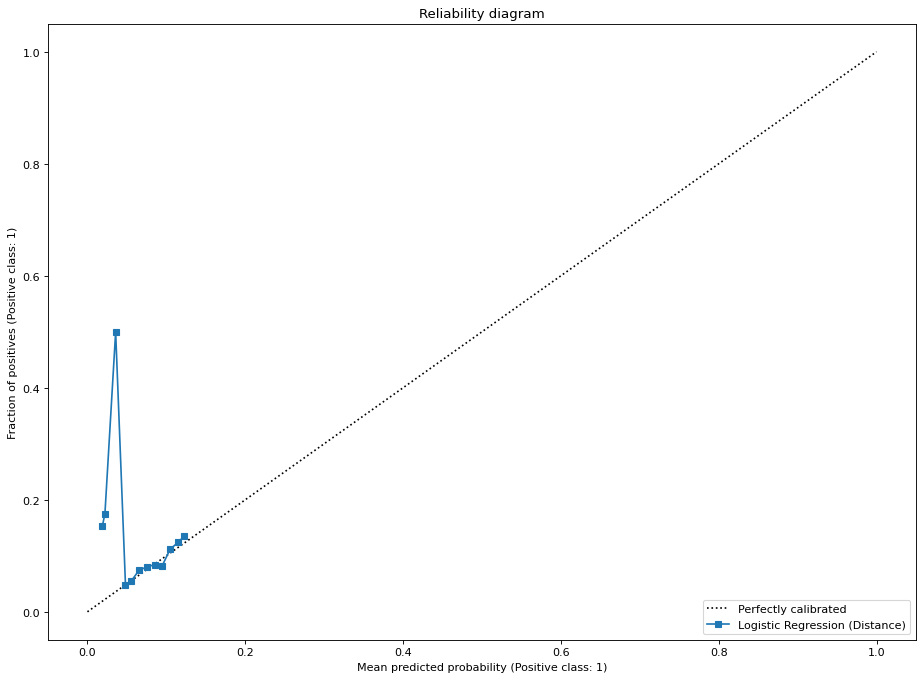

In [16]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(lg_2, X_test, y_test, name='Logistic Regression (Distance)', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('./figures/31_logR_RD_Angle.png')
plt.show()

In [18]:
df1=pd.DataFrame(train_set[["Angle_from_net","Distance_from_net","Is_goal"]])
df=df1.dropna()
x_input=df[["Angle_from_net","Distance_from_net"]]
isGoal_output=df["Is_goal"]
X_train, X_test, y_train, y_test = train_test_split(x_input, isGoal_output, test_size=0.3, random_state=42)
print(X_train)
X_train= np.array(X_train)
X_test = np.array(X_test)
lg_3=LogisticRegression()
lg_3.fit(X_train,y_train)
prediction=lg_3.predict(X_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f = f1_score(y_test, prediction)
dump(lg_3, './models/baseline_distance_angle_logistic_reg.joblib')
print(lg_3.predict_proba(X_test))
lg_3.score(X_test, y_test)
print("The classification report:\n", classification_report(y_test,prediction))

       Angle_from_net  Distance_from_net
80170        5.355825          32.140317
4455        10.304846          11.180340
64672       70.346176          14.866069
50016       48.814075          10.630146
3749        25.277722          39.812058
...               ...                ...
40875       46.468801          27.586228
13367       15.255119          34.205263
52930        3.764035          76.164296
67866       25.513870          48.754487
42954        6.632515          43.289722

[231846 rows x 2 columns]
[[0.86349739 0.13650261]
 [0.90941975 0.09058025]
 [0.89971353 0.10028647]
 ...
 [0.87963251 0.12036749]
 [0.93915007 0.06084993]
 [0.78626067 0.21373933]]
The classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     89959
           1       0.00      0.00      0.00      9404

    accuracy                           0.91     99363
   macro avg       0.45      0.50      0.48     99363
weighted avg       0.82  

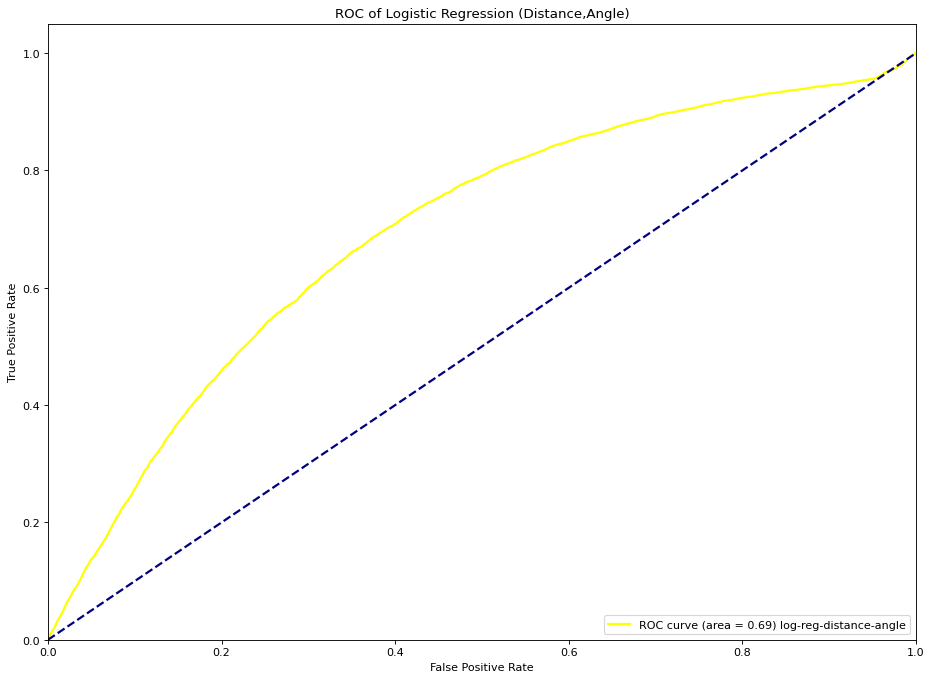

In [19]:
from sklearn.metrics import roc_curve, auc

y_score = lg_3.predict_proba(X_test)[:,1]
a, b, _ = roc_curve(y_test, y_score)
roc_auc_d = auc(a, b)
plt.figure()
plt.plot(
    a,
    b,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance-angle" % roc_auc_d,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Distance,Angle)")
plt.legend(loc="lower right")

plt.savefig('./figures/q31_logR_ROC_distance_angle.png.png')
plt.show()

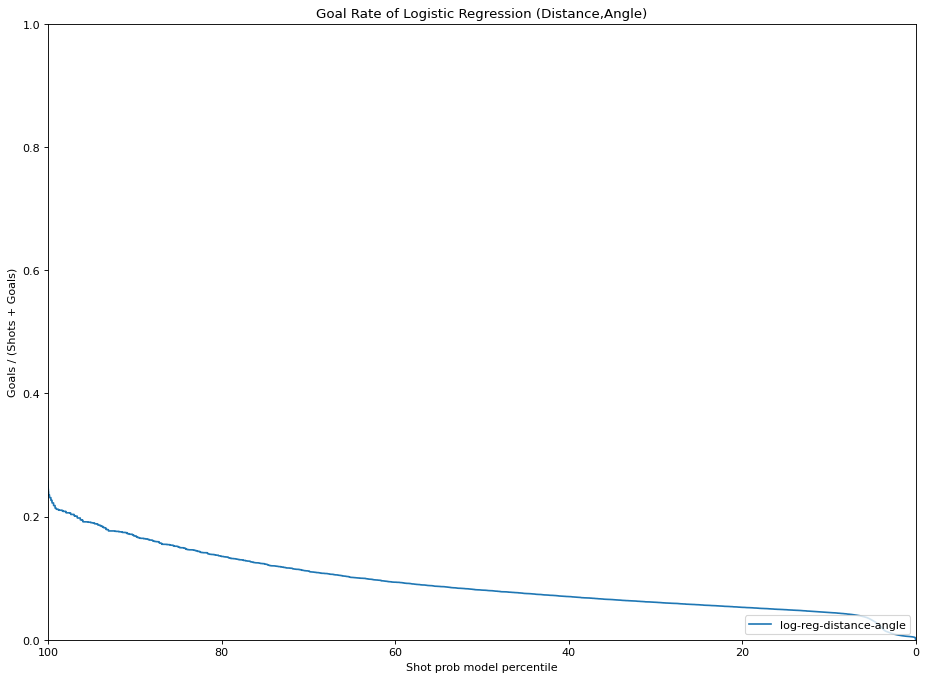

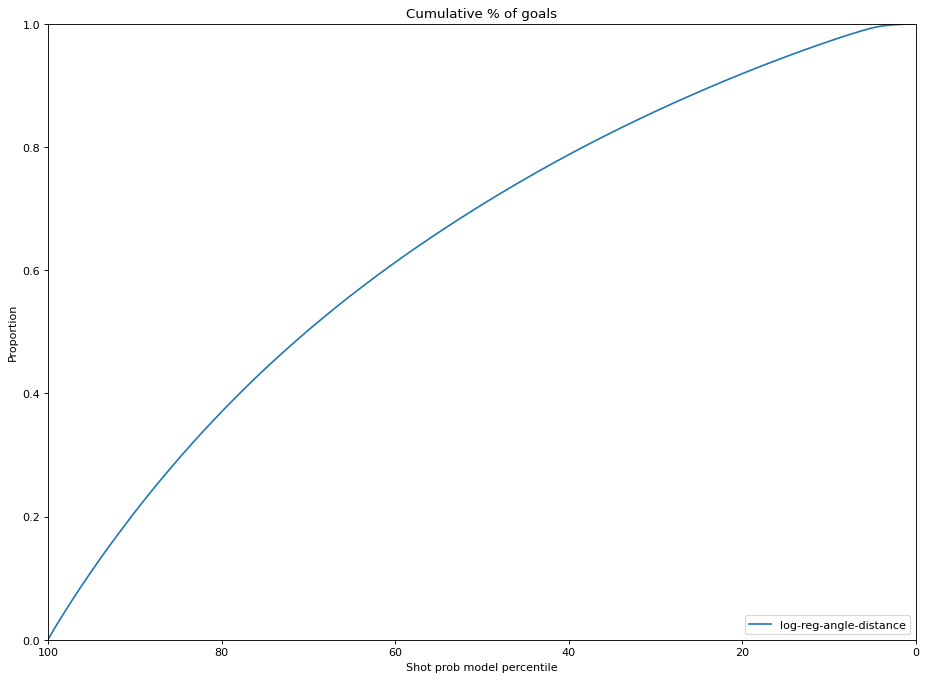

In [20]:
#model percentile
iu = lg_3.predict_proba(X_test)[:,1]
n = len(iu)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

iu_y = iu[::-1]
iu_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum = np.cumsum(iu_y)


plt.figure()
plt.plot(
    x_axis,
    iu_y,
    label = 'log-reg-distance-angle'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Distance,Angle)")
plt.legend(loc="lower right")
plt.savefig('./figures/q31_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    iu_y_sum/sum(iu_y),
    label = 'log-reg-angle-distance'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('./figures/q31_logR_CP_distance_angle.png')
plt.show()

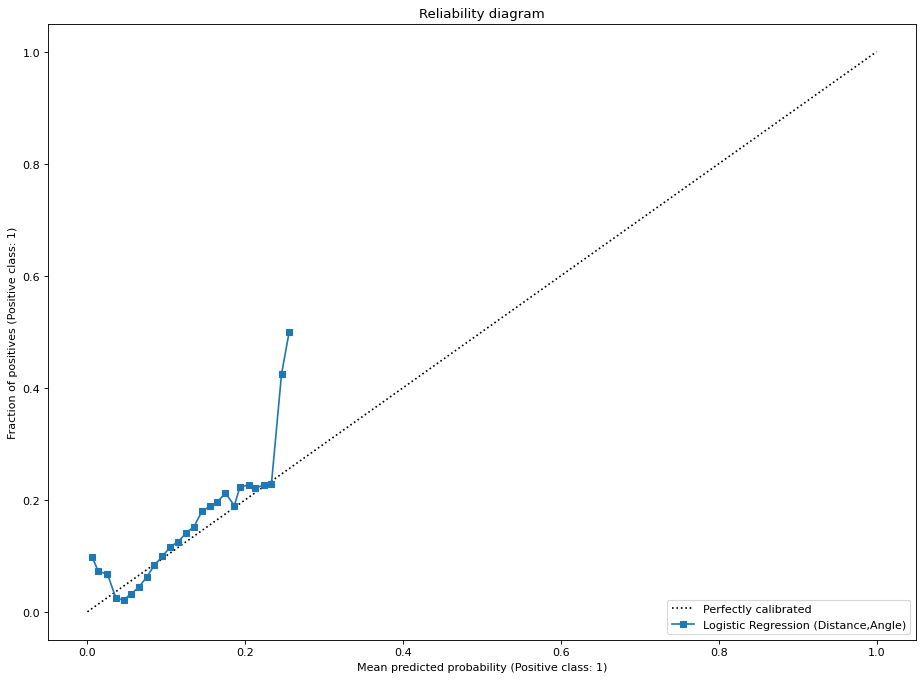

In [21]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(lg_3, X_test, y_test, name='Logistic Regression (Distance,Angle)', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('./figures/31_logR_RD_distance_Angle.png')
plt.show()